# Homework
# House prices data analysis

## Using statistics to analyse data
<hr>

#### Importing packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model

### Reading the data

In [3]:
df = pd.read_csv("train.csv")
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# Homework 
а) Групирайте данните. Определете най-малката и най-голямата стойност,
размаха R на данните, броя групи k (използвайте формулата 𝒌 = 𝟏 + 𝐥𝐨𝐠𝟐 𝒏,
където n е броят на вашите данни), дължината на интервалите h=R/k.

In [4]:
prices = df['SalePrice']
min_price = min(prices)
print("Min price: " + str(min_price))

max_price = max(prices)
print("Max price: " + str(max_price))

R_prices = np.ptp(prices)
print("Range = " + str(R_prices))

n = prices.size
print("Number of data = " + str(n))

k = np.ceil(1 + np.log2(n))
print("Number of groups = " + str(k))

h = np.ceil(R_prices/k)
print("Range of intervals: " + str(h))

bin_edges = np.arange(min_price, max_price + h, h)
print("Bin edges: ", bin_edges)

df['PriceGroup'] = pd.cut(prices, bins=bin_edges, include_lowest=True)


print(df['PriceGroup'].value_counts())


Min price: 34900
Max price: 755000
Range = 720100
Number of data = 1460
Number of groups = 12.0
Range of intervals: 60009.0
Bin edges:  [ 34900.  94909. 154918. 214927. 274936. 334945. 394954. 454963. 514972.
 574981. 634990. 694999. 755008.]
PriceGroup
(94909.0, 154918.0]     554
(154918.0, 214927.0]    447
(214927.0, 274936.0]    202
(34899.999, 94909.0]     99
(274936.0, 334945.0]     88
(334945.0, 394954.0]     40
(394954.0, 454963.0]     17
(454963.0, 514972.0]      5
(514972.0, 574981.0]      3
(574981.0, 634990.0]      3
(694999.0, 755008.0]      2
(634990.0, 694999.0]      0
Name: count, dtype: int64


<h4>б) Направете честотна таблица. Пресметнете честотата на данните във
всеки от интервалите с функцията COUNTIFS (или подобна, ако използвате друг
софтуер). Намерете акумулираната честота, относителната честота и акумулираната
относителна честота.</h4>


In [5]:
frequency_table = df['PriceGroup'].value_counts().sort_index().reset_index()
frequency_table.columns = ['Interval', 'Frequency']

frequency_table['Cumulative Frequency'] = frequency_table['Frequency'].cumsum()

frequency_table['Relative Frequency'] = frequency_table['Frequency'] / n

frequency_table['Cumulative Relative Frequency'] = frequency_table['Relative Frequency'].cumsum()

print(frequency_table)

                Interval  Frequency  Cumulative Frequency  Relative Frequency  \
0   (34899.999, 94909.0]         99                    99            0.067808   
1    (94909.0, 154918.0]        554                   653            0.379452   
2   (154918.0, 214927.0]        447                  1100            0.306164   
3   (214927.0, 274936.0]        202                  1302            0.138356   
4   (274936.0, 334945.0]         88                  1390            0.060274   
5   (334945.0, 394954.0]         40                  1430            0.027397   
6   (394954.0, 454963.0]         17                  1447            0.011644   
7   (454963.0, 514972.0]          5                  1452            0.003425   
8   (514972.0, 574981.0]          3                  1455            0.002055   
9   (574981.0, 634990.0]          3                  1458            0.002055   
10  (634990.0, 694999.0]          0                  1458            0.000000   
11  (694999.0, 755008.0]    

<h4>в) Намерете средноаритметичната стойност на вашите данни с функцията
AVERAGE, дисперсията – с VAR.S и стандартното отклонение – с STDEV.S.
Анализирайте получените стойности.</h4>

In [7]:
mean_price = prices.mean()
print("Arithmetic Mean (Average) of Sale Prices:", mean_price)


variance_price = prices.var(ddof=1)
print("Variance of Sale Prices:", variance_price)


std_dev_price = prices.std(ddof=1)
print("Standard Deviation of Sale Prices:", std_dev_price)

Arithmetic Mean (Average) of Sale Prices: 180921.19589041095
Variance of Sale Prices: 6311111264.297448
Standard Deviation of Sale Prices: 79442.50288288662


# Анализ
<ol>
<li>Средната цена на имот е 180921$.</li>
<li>Дисперсията е приблизително 6*(10^9)</li>
<li>Средното отклонение е приблизително 79000$</li>
</ol>
<p>Може да забележим, че средното отклонение е 79000, а средната стойност е около 180000. Можем да очакваме, че по-голямата част от данните ще са в интервала [101000; 259000]</p>


In [11]:
data_in_interval = prices[(prices >= 101000) & (prices <= 259000)].count()
print(str(np.ceil(data_in_interval/n*100)) + "%")

79.0%


Можем да видим, че 79% от имотите са в този ценови интервал

<h4>г) Представете графично събраните данни с помощта на хистограма, като
дължината на интервалите отговаря на пресметнатата в подточка а).</h4>

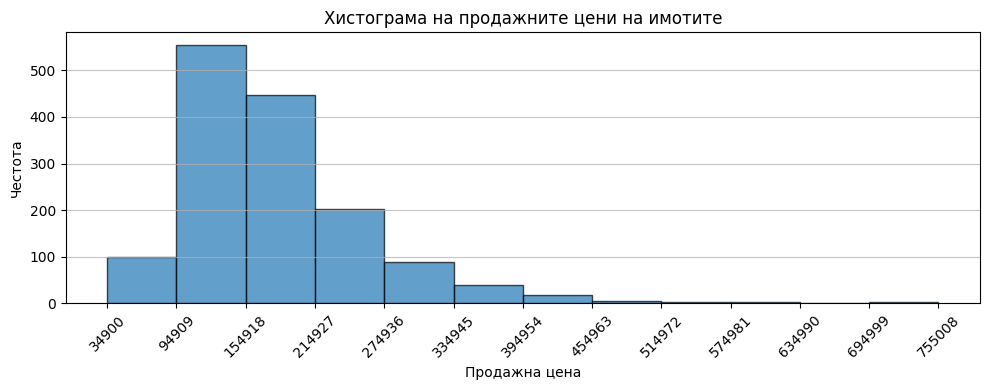

In [32]:
plt.figure(figsize=(10,4))
plt.hist(prices, bins=bin_edges, edgecolor='black', alpha=0.7)
plt.title('Хистограма на продажните цени на имотите')
plt.xlabel('Продажна цена')
plt.ylabel('Честота')
plt.xticks(bin_edges, rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()